# Первая лабораторная

Лабораторная состоит из набора примеров и трёх заданий:
* [Задание 1](#Задание-1.) - подбор двух изображений;
* [Задание 2](#Задание-2.) - нахождение параметра детектора границ;
* [Задание 3](#Задание-3.) - поиск разделяющего правила.

Сначала нужно ознакомиться с примерами, после чего выполнять задания.

## 0. Jupyter

Jupyter - интерактивная среда, позволяющая хранить код, текст, графику и результаты выполнения кода в одном месте - ноутбуке.

Ноутбук разбит на ячейки двух типов: `Markdown` - для текста, и `Code` - с кодом и результатом выполнения, в т.ч. с графиками. Чтобы запустить код в определённой ячейке, её нужно выделить и нажать `Run` (Shift+Enter). Если изменить код ячейки, но не перезапустить её, результат не изменится.

В ячейках с кодом можно использовать язык Python с расширениями. Команда вызова расширения как правило начинается с `%`.
Также встроенным редактором кода поддерживается автодополнение по клавише `Tab`.

Для вывода графики будем использовать `matplotlib`. Подключим его, попутно измерив время подключения пакета:

In [1]:
%time
from matplotlib import pyplot as plt

Wall time: 0 ns


Все графики matplotlib будут выводиться под кодом. Например, вот пример кода для вывода графика линейной функции:

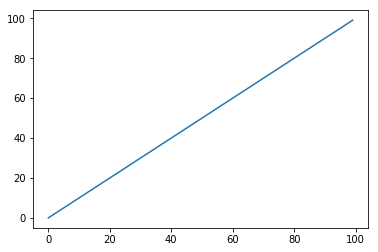

In [2]:
plt.plot(range(100), range(100))

## 1. NumPy
NumPy - пакет, позволяющий хранить / выполнять быстрые операции над матрицами в Python.

In [3]:
import numpy as np

**Работа с многомерными массивами**

Массив в NumPy характеризуется:
* типом значений (dtype)
* числом осей (ndim)
* размерностью (shape) - то есть числом элементов по каждой оси

Важно, что массивы в NumPy (объекты numpy.ndarray) лежат в памяти линейно.

Массивы можно создавать из списков (python list).

Также, есть методы для создания пустых, единичных, заполненных константой матриц и др.

Например, создание матрицы *3x5*, заполненной единицами, выглядит следующим образом:

In [31]:
a = np.ones((3, 5))

Где `(3, 5)` (скобки обязательны) - кортеж (python tuple) с количествами элементов по осям.

In [32]:
print(f"Тип значений: {a.dtype}, число осей: {a.ndim}, размерности: {a.shape}")
print(a)

Тип значений: float64, число осей: 2, размерности: (3, 5)
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


Доступ к элементам массива осуществляется следующим образом:

In [34]:
print(f"Первый элемент первой строки: {a[0, 0]}")
print(f"Весь второй столбец: {a[:, 1]}")

Первый элемент первой строки: 1.0
Весь второй столбец: [1. 1. 1.]


Также можно изменять элементы, например:

In [35]:
a[:, 1] = [2, 3, 4]
print(a)

[[1. 2. 1. 1. 1.]
 [1. 3. 1. 1. 1.]
 [1. 4. 1. 1. 1.]]


Размерности массива можно менять, при этом память под новый массив не выделяется:

In [36]:
b = a.reshape((5, 3))
b[1, 1] = 0
print(b)

[[1. 2. 1.]
 [1. 0. 1.]
 [3. 1. 1.]
 [1. 1. 4.]
 [1. 1. 1.]]


Был изменён элемент матрицы `b`, но `a` тоже поменялась:

In [37]:
print(a)

[[1. 2. 1. 1. 0.]
 [1. 3. 1. 1. 1.]
 [1. 4. 1. 1. 1.]]


Чтобы избежать такого эффекта можно создать *глубокую* копию:

In [38]:
c = a.copy()
c[0, 4] = 1

In [39]:
print(a)
print(c)

[[1. 2. 1. 1. 0.]
 [1. 3. 1. 1. 1.]
 [1. 4. 1. 1. 1.]]
[[1. 2. 1. 1. 1.]
 [1. 3. 1. 1. 1.]
 [1. 4. 1. 1. 1.]]


Заметим, что поменялась только матрица **c**.

Существует также метод намеренного создания наоборот *слабой* копии: `view()`, чтобы избегать лишнего копирования данных, когда такое поведение допустимо.

Освежить знания по Python, а также узнать более подробно про NumPy и MatPlotLib можно [здесь](http://cs231n.github.io/python-numpy-tutorial/)

## 2. Работа с изображениями

Загрузим изображение с помощью библиотеки `imageio`:

In [4]:
from imageio import imread, imsave
kitten = imread("kitten.jpg")

Изображения представляются массивами numpy с размерностью `(высота, ширина, число каналов)`, где каналы - как правило компоненты RGB.

Убедимся в этом, взгялув на размерность загруженного изображения:

In [41]:
print(kitten.shape)

(150, 150, 3)


Для вывода изображения воспользуемся matplotlib:

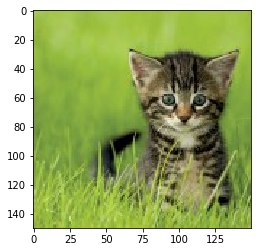

In [42]:
plt.imshow(kitten)

### Размерности изображений

Часто возникает проблема, когда изображение хранится в "сыром" виде с неправильным порядком каналов, например не `(высота, ширина, число каналов)`, а `(число каналов, высота, ширина)`.

Такая же проблема часто появляется при обработке изображений с помощью библиотек глубокого обучения: в Theano каналы идут до высоты, в Tensorflow - после ширины. Соответственно, может возникнуть задача переводить одно представление в другое.

Рассмотрим пример: дан numpy массив `data`, содержащий изображение, в котором каналы располагаются по горизонтали.

(150, 450)


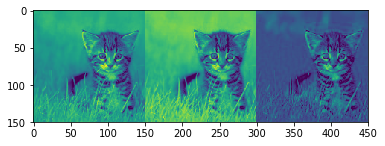

In [43]:
data = np.load("shaped_incorrectly.npy")
print(data.shape)
plt.imshow(data)

In [44]:
result = data.reshape((150, 3, 150)) # резрежем изображение на три квадрата по горизонтали
result = np.dstack([result[:, i, :] for i in range(3)]) # составим из трёх изображений (150, 150) одно (150, 150, 3)

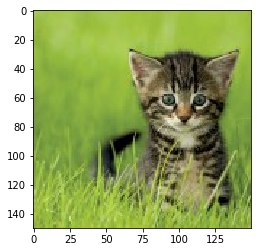

In [45]:
plt.imshow(result)

Поскольку задача типичная, существует более традиционый метод переставить оси `(150, 3, 150) -> (150, 150, 3)`: `np.swapaxes(result, -1, 1)`

### Пример задачи поиска описывающего прямоугольника

Рассмотрим простую задачу. Пусть дано изображение тёмного котёнка на фоне зелёной травы. Требуется найти описывающий прямоугольник (такой, чтобы весь котёнок оказался внутри).

Посмотрим на значения каналов:

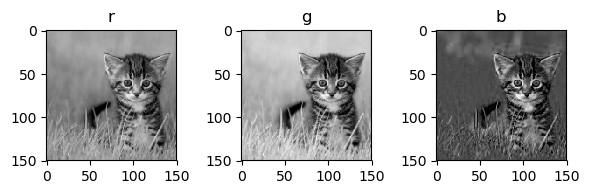

In [46]:
f, ax = plt.subplots(1, 3) # создадим сетку, в которую будем выводить картинки
f.set_dpi(100)             # повысим чёткость изображений
for i in range(3):
    ax[i].set_title("rgb"[i])                 # поставим подпись, соответствующую номеру канала
    ax[i].imshow(kitten[..., i], cmap="gray") # выведем значение канала с чёрно-белой цветовой схемой
f.tight_layout() # добавим границы, чтобы графики не наезжали друг на друга

Заметим, что синий канал самый тусклый, а зелёный ярче красного почти только на траве.

Значит для пикселей вокруг котёнка выполнено: $g > r$. Тогда пикселям котёнка соответствует обратное неравенство.

Проверим это:

Результат - матрица типа bool


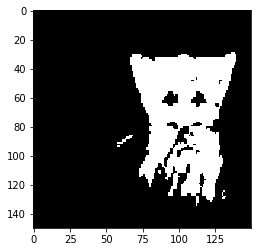

In [47]:
r = kitten[..., 0] # берём все значения по высоте и ширине, фиксируя только номер канала. Равносильно kitten[:, :, 0]
g = kitten[..., 1]
mask = r > g
plt.imshow(mask, cmap="gray")
print(f"Результат - матрица типа {mask.dtype}")

Переберём все строки чтобы найти верхнюю и нижнюю границы описывающиего прямоугольника:

In [48]:
top = mask.shape[0]
bottom = 0
for row in range(mask.shape[0]): # проходим по всем строкам
    if mask[row, :].sum() > 0:   # проверяем, что в строке есть хоть один элемент равный true 
        top = min(top, row)
        bottom = max(bottom, row)
print(f"Top: {top}, bottom: {bottom}")

Top: 29, bottom: 134


Аналогично поступим со столбцами:

In [49]:
left = mask.shape[1]
right = 0
for col in range(mask.shape[1]): # проходим по всем столбцам
    if mask[:, col].sum() > 0:
        left = min(left, col)
        right = max(right, col)
print(f"Left: {left}, right: {right}")

Left: 58, right: 139


Нарисуем описывающий прямоугольник поверх изображения с помощью `matplotlib.patches`:

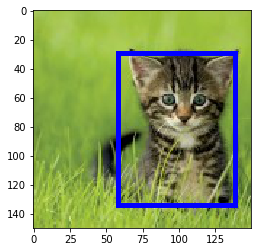

In [50]:
from matplotlib.patches import Rectangle

f, ax = plt.subplots(1, 1)
ax.imshow(kitten)

corner = (left, top)
height = bottom - top
width = right - left
ax.add_patch(Rectangle(corner, width, height, linewidth=5, edgecolor='b', facecolor='none'))

### Задание 1.

Дано изображение:

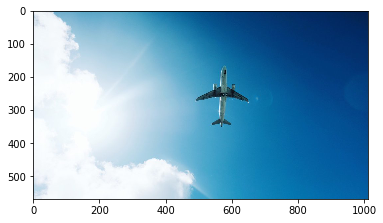

In [5]:
from skimage.color import rgb2gray
airplane = imread("airplane.jpg")
plt.imshow(airplane)

Посмотрим гистограммы интенсивностей пикселей внутри двух прямоугольников: с объектом и без него.

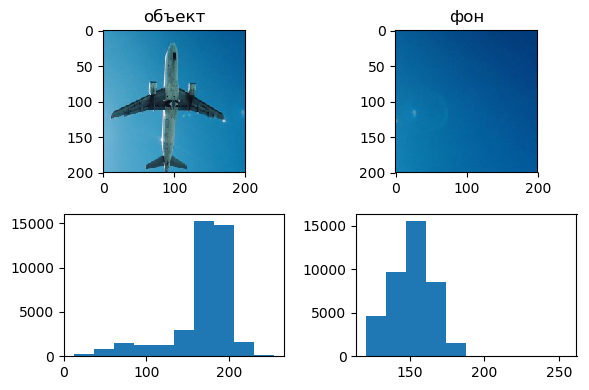

In [11]:
f, ax = plt.subplots(2, 2) # создадим сетку, в которую будем выводить картинки
f.set_dpi(100)             # повысим чёткость изображений

airplane_object     = airplane[150:350, 480:680]
airplane_background = airplane[150:350, 650:850]

ax[0, 0].set_title("объект")
ax[0, 1].set_title("фон")
ax[0, 0].imshow(airplane_object, cmap="gray")
ax[0, 1].imshow(airplane_background, cmap="gray")
ax[1, 0].hist(airplane_object[..., 2].flatten()) # выведем гистограмму синего канала куска изображения с объектом
ax[1, 1].hist(airplane_background[..., 2].flatten())

f.tight_layout() # добавим границы, чтобы графики не наезжали друг на друга

*В коде `flatten` склеивает все размерности в одну. В данном случае `(150, 150) -> (22500,)`*

**Задача: подобрать два изображения, на которых объект:**
* имеет гистограмму, аналогичную гистограмме фона;
* имеет гистограмму, сильно отличающуюся от фона.

*Изображения надо поместить в папку с ноутбуком.*

Гистограммы близки:

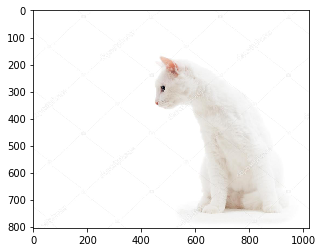

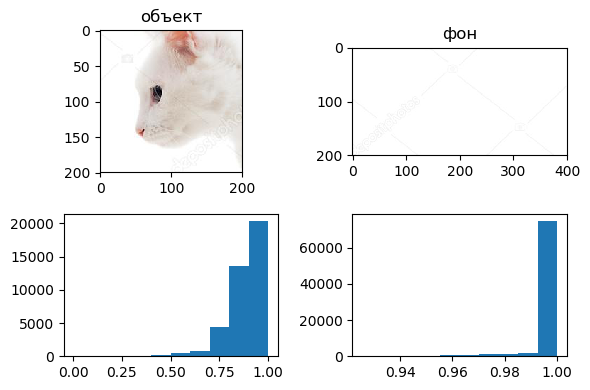

In [26]:
first_img = imread("2.jpg")
plt.imshow(first_img)

f, ax = plt.subplots(2, 2)
f.set_dpi(100)

first_object     = first_img[200:400, 400:600]
first_background = first_img[200:400, 0:400]

ax[0, 0].set_title("объект")
ax[0, 1].set_title("фон")
ax[0, 0].imshow(first_object, cmap="gray")
ax[0, 1].imshow(first_background, cmap="gray")
ax[1, 0].hist(rgb2gray(first_object).flatten())
ax[1, 1].hist(rgb2gray(first_background).flatten())

f.tight_layout()

Гистограммы различны:

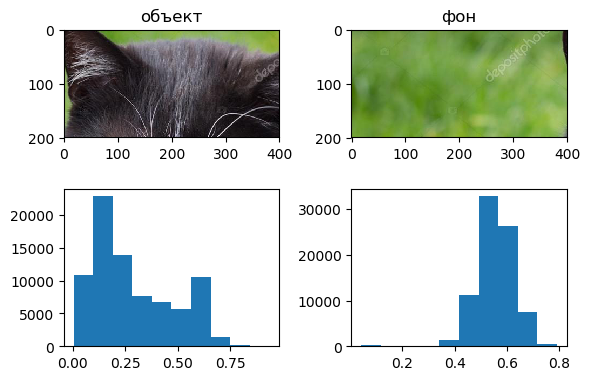

In [51]:
second_img = imread("different.jpg")
f, ax = plt.subplots(2, 2)
f.set_dpi(100)

second_object     = second_img[200:400, 400:800]
second_background = second_img[200:400, 0:400]

ax[0, 0].set_title("объект")
ax[0, 1].set_title("фон")
ax[0, 0].imshow(second_object, cmap="gray")
ax[0, 1].imshow(second_background, cmap="gray")
ax[1, 0].hist(rgb2gray(second_object).flatten())
ax[1, 1].hist(rgb2gray(second_background).flatten())

f.tight_layout()

### Задание 2.

Ниже приведён пример поиска границ для изображения `lena`.

Требуется подобрать параметр `sigma` так, чтобы границы начали выделяться адекватно.

Дополнительно можно посмотреть доступные фильтры в [skimage.filters](http://scikit-image.org/docs/dev/api/skimage.filters.html)

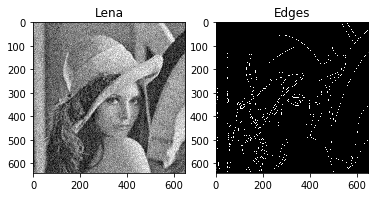

In [71]:
from skimage.feature import canny

lena = imread("lena.png")

lena_gray = rgb2gray(lena)
lena_edges = canny(lena_gray, sigma=3)

f, ax = plt.subplots(1, 2)
ax[0].set_title("Lena")
ax[1].set_title("Edges")
ax[0].imshow(lena)
ax[1].imshow(lena_edges, cmap="gray")

## 2. Pandas

Pandas - популярный пакет для анализа данных. С помощью него можно загружать датасеты различных форматов, производить отбор признаков, быстро строить графики по подмножествам данных и т.п.

Основных сущностей в Pandas две:
* DataFrame - таблица, включающая информацию о типе и названии каждого столбца, вместе с данными;
* Series - последовательность значений, например, значения столбца таблицы.

Подключим Pandas и загрузим датасет "Titanic":

In [9]:
import pandas as pd

titanic_addr = "https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/ff414a1bcfcba32481e4d4e8db578e55872a2ca1/titanic.csv"
titanic = pd.read_csv(titanic_addr)

In [73]:
titanic.head() # выведем заголовки столбцов и первые 5 строк

,PassengerId Survived Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked
1\t0\t3\tBraund,Mr. Owen Harris\tmale\t22\t1\t0\tA/5 21171\t7...
2\t1\t1\tCumings,Mrs. John Bradley (Florence Briggs Thayer)\tf...
3\t1\t3\tHeikkinen,Miss. Laina\tfemale\t26\t0\t0\tSTON/O2. 31012...
4\t1\t1\tFutrelle,Mrs. Jacques Heath (Lily May Peel)\tfemale\t3...
5\t0\t3\tAllen,Mr. William Henry\tmale\t35\t0\t0\t373450\t8....


Видно, что данные неправильно разбились на столбцы. Чтобы это исправить поменяем разделитель:

In [10]:
titanic = pd.read_csv(titanic_addr, delimiter="\t")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,156.000000,156.000000,156.000000,126.000000,156.000000,156.000000,156.000000
mean,78.500000,0.346154,2.423077,28.141508,0.615385,0.397436,28.109587
std,45.177428,0.477275,0.795459,14.613880,1.056235,0.870146,39.401047
min,1.000000,0.000000,1.000000,0.830000,0.000000,0.000000,6.750000
25%,39.750000,0.000000,2.000000,19.000000,0.000000,0.000000,8.003150
50%,78.500000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,117.250000,1.000000,3.000000,35.000000,1.000000,0.000000,30.371850
max,156.000000,1.000000,3.000000,71.000000,5.000000,5.000000,263.000000


Из описания видно, что `PassengerId` - просто номер строки, который можно исключить, а `Pclass` - категориальная переменная. Избавимся от столбца `PassengerId`:

In [11]:
titanic = titanic.drop(columns=["PassengerId"])

Посмотрим на гистограмму классов (`Pclass`):

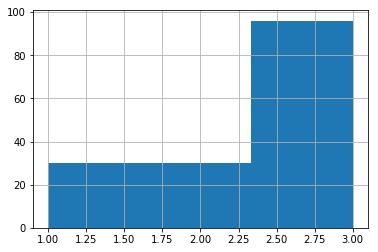

In [12]:
titanic.Pclass.hist(bins=3) # заведомо знаем, что Pclass может иметь три значения: 1, 2 или 3

Попробуем найти правило, по которому можно определить принадлежит ли строка "выжившим".

Взглянем на гистограммы возраста "выживших" (тех, у кого `Survived = 1`) и не "выживших":

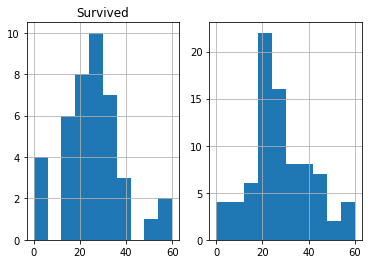

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title("Survived")
titanic[titanic.Survived == 1].Age.hist(ax=ax1, range=(0, 60))
titanic[titanic.Survived == 0].Age.hist(ax=ax2, range=(0, 60))

Поскольку гистограммы различны, скорей всего получится научиться отделять "выживших" от не "выживших".

Выберем все строки с возрастом от 20 до 60 - для этого воспользуемся методом `query`, и посмотрим отдельно на гистограммы возраста и "выживаемости" для мужчин:

In [14]:
titanic_middle_age = titanic.query("Age > 20 and Age < 60")

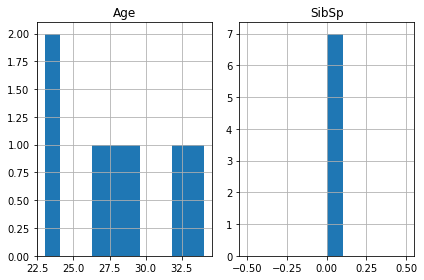

In [15]:
titanic_middle_age_male = titanic_middle_age.query("Sex == 'male'")
titanic_middle_age_male.query("Survived == 1").hist(column=["Age", "SibSp"])
plt.tight_layout()

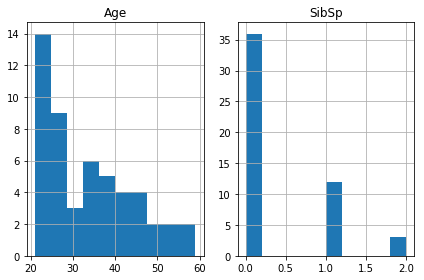

In [16]:
titanic_middle_age_male.query("Survived == 0").hist(column=["Age", "SibSp"])
plt.tight_layout()

Из этих гистограмм можно "на глаз" оценить множество почти точно не "выживших":

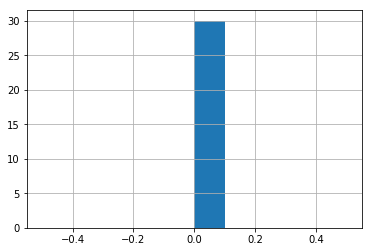

In [17]:
titanic_middle_age_male.query("Age > 34 or SibSp > 0.1").Survived.hist()

### Задание 3.

Найдите аналогичный простой запрос (`query`), для заданного датафрейма `titanic_middle_age_female`, разделяющий множество по критерию `Survived` на два подмножества: точно не "выжившие" и возможно выжившие, или наоборот.

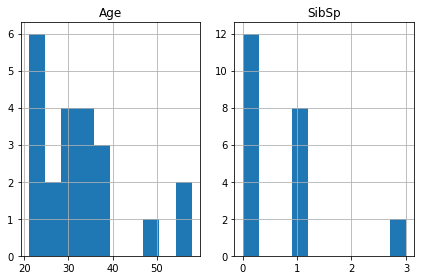

In [18]:
titanic_middle_age_female = titanic_middle_age.query("Sex == 'female'")
titanic_middle_age_female.query("Survived == 1").hist(column=["Age", "SibSp"])
plt.tight_layout()

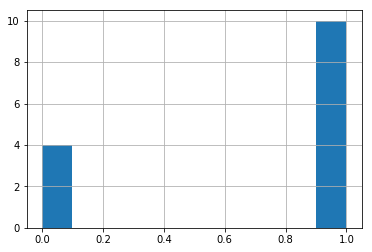

In [20]:
titanic_middle_age_female.query("SibSp > 0").Survived.hist()

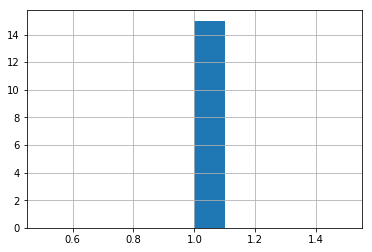

In [27]:
titanic_middle_age_female.query("Survived == 1 and Age < 35").Survived.hist() #выжившие с возрастои меньше 35